# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

# Ingest Data  

In [56]:
df = pd.read_excel("World military power.xlsx", skiprows=1)
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


# EDA

In [57]:
df.shape

(138, 60)

In [58]:
df.info() #There are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

## Convert multi index columns to one level

In [59]:
#It is done with while reading the excel sheet at the beginning via neglegting the first row.

## Detect and drop duplicated columns

In [60]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [61]:
df.select_dtypes('object')

,Military Strength,Aircraft Strength,Fighter/Interceptor Strength,Attack Aircraft Strength,Transport Aircraft Fleet Strength,Trainer Aircraft Fleet,Helicopter Fleet Strength,Attack Helicopter Fleet Strength,Tank Strength,AFV/APC Strength,...,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage
0,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan
1,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,...,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania
2,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,...,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria
3,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,...,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola
4,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,...,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,...,"1,42,60,129",Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800,Venezuela,7100,Venezuela
134,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,...,"5,10,43,216",Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444,Vietnam,17702,Vietnam
135,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,...,"1,12,66,221",Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906,Yemen,0,Yemen
136,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,...,"61,66,905",Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250,Zambia


In [62]:
#df[df.columns[~df.columns.isin()]]
df2 = df.loc[:,df.columns.str.contains('value')]

In [63]:
df3 = df[['Military Strength', 'Military Strength Power Index']]

In [64]:
data =  pd.concat([df3, df2], axis=1)

In [65]:
data.rename(columns={'Military Strength':'Country'}, inplace=True)

In [66]:
data

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,...,4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,...,176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,...,1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260,38,0,52,82,86,10,390,...,444,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100,5267.0
134,Vietnam,0.3559,293,77,0,38,36,138,25,2615,...,45,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702,4616.0
135,Yemen,1.2412,169,77,0,8,21,61,14,620,...,57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0,1601.0
136,Zambia,1.6464,108,18,0,11,52,27,0,75,...,88,0,21000,0,"61,66,905","1,64,45,079","7,52,618",NaN,2250,6043.0


## Check for missing values 

In [67]:
data.isnull().sum().sum()

144

In [68]:
data.isnull().sum()

Country                                     0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

In [69]:
data.duplicated().sum()

0

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [70]:
data[data.Country== "Austria"]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
7,Austria,0.9568,120,15,0,11,32,62,0,56,...,52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524.0


In [71]:
data[["Country", "Navy Fleet Strengths value"]]

,Country,Navy Fleet Strengths value
0,Afghanistan,0.0
1,Albania,38.0
2,Algeria,201.0
3,Angola,57.0
4,Argentina,49.0
...,...,...
133,Venezuela,49.0
134,Vietnam,65.0
135,Yemen,30.0
136,Zambia,0.0


In [72]:
#Source = https://www.globalfirepower.com/navy-ships.php
data.loc[data["Navy Fleet Strengths value"].isnull() == True, ["Navy Fleet Strengths value"]] = 0


In [73]:
data["Navy Fleet Strengths value"].isnull().sum()

0

In [74]:
data["Aircraft Carrier Fleet Strength value"].isnull().sum()

23

In [75]:
data[["Country", "Aircraft Carrier Fleet Strength value"]]

,Country,Aircraft Carrier Fleet Strength value
0,Afghanistan,0.0
1,Albania,0.0
2,Algeria,0.0
3,Angola,0.0
4,Argentina,0.0
...,...,...
133,Venezuela,0.0
134,Vietnam,0.0
135,Yemen,0.0
136,Zambia,0.0


In [76]:
data.loc[data["Aircraft Carrier Fleet Strength value"].isnull() == True][["Country", "Aircraft Carrier Fleet Strength value"]]

,Country,Aircraft Carrier Fleet Strength value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN


In [77]:
#https://en.wikipedia.org/wiki/List_of_aircraft_carriers
data.loc[data["Aircraft Carrier Fleet Strength value"].isnull() == True, ["Aircraft Carrier Fleet Strength value"]] = 0

In [78]:
#Source: https://worldpopulationreview.com/country-rankings/submarines-by-country
data.loc[data["Submarine Fleet Strength value"].isnull() == True, ["Submarine Fleet Strength value"]] = 0

In [79]:
#Source : https://www.globalfirepower.com/navy-frigates.php
data.loc[data["Frigate Fleet Strength value"].isnull() == True, ["Frigate Fleet Strength value"]] = 0

In [80]:
#Source : https://www.globalfirepower.com/navy-destroyers.php
data.loc[data["Destroyer Fleet Strength value"].isnull() == True, ["Destroyer Fleet Strength value"]] = 0

In [81]:
data.loc[data["Total Coastline Coverage value"].isnull()==True][["Country", "Total Coastline Coverage value"]]

,Country,Total Coastline Coverage value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
14,Bolivia,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN


In [82]:
#Source = https://www.globalfirepower.com/coastline-coverage.php

data.loc[data["Total Coastline Coverage value"].isnull() == True, ["Total Coastline Coverage value"]] = 0

In [83]:
data.loc[data["Total Border Coverage value"].isnull()==True][["Country", "Total Border Coverage value"]]

,Country,Total Border Coverage value
6,Australia,NaN
9,Bahrain,NaN
57,Japan,NaN
69,Madagascar,NaN
83,New Zealand,NaN
95,Philippines,NaN
105,Singapore,NaN
113,Sri Lanka,NaN
119,Taiwan,NaN


In [84]:
#Source: https://www.globalfirepower.com/border-coverage.php
data.loc[data["Total Border Coverage value"].isnull() == True, ["Total Border Coverage value"]] = 0

In [85]:
data.isnull().sum()

Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

## Fix the dtypes

In [86]:
data.select_dtypes('object')

,Country,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200
1,Albania,"25,00,00,000","9,50,50,00,000",16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000
...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100
134,Vietnam,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702
135,Yemen,"1,40,00,00,000","7,06,80,00,000",12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0
136,Zambia,"4,00,00,000","11,66,00,00,000",0,21000,0,"61,66,905","1,64,45,079","7,52,618",0,2250


In [87]:
for col in data.columns[1:]:
    if data.dtypes[col] == np.object:
        data[col] = data[col].apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")

In [88]:
data.select_dtypes('object')

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
133,Venezuela
134,Vietnam
135,Yemen
136,Zambia


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [90]:
data = data.drop(["Total Square Land Area value","Total Coastline Coverage value","Total Waterway Coverage value","Total Border Coverage value"], axis = 1)
data.shape

(138, 27)

## Visualy inspect the some features

In [91]:
data.columns

Index(['Country', 'Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value'],
      dtype='object')

In [92]:
import plotly.express as px

In [93]:
fig = px.box(data, x = data["Aircraft Strength value"],
             hover_name=data["Country"])
fig.show()

In [94]:
fig = px.box(data, x = data["Tank Strength value"],
             hover_name=data["Country"])

fig.show()

In [95]:
fig = px.box(data, x = data["Navy Fleet Strengths value"],
             hover_name=data["Country"])

fig.show()

## Decriptive statistics

In [96]:
data.describe().T
#It is easy to see that many columns have outliers.  But I think they are useful values.

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


In [97]:
fig = px.imshow(data.corr())
fig.show()

# Data Preprocessing

In [98]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [99]:
data1 = data.copy()

In [100]:
data1.reset_index(inplace=True)

In [101]:
X = data1.drop(["Country"], axis = 1)

In [102]:
z = StandardScaler()

X_scaled = z.fit_transform(X)

# Modelling

In [103]:
K_means_model = KMeans(random_state = 42)

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [104]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

Text(0.5, 1.0, 'elbow method')

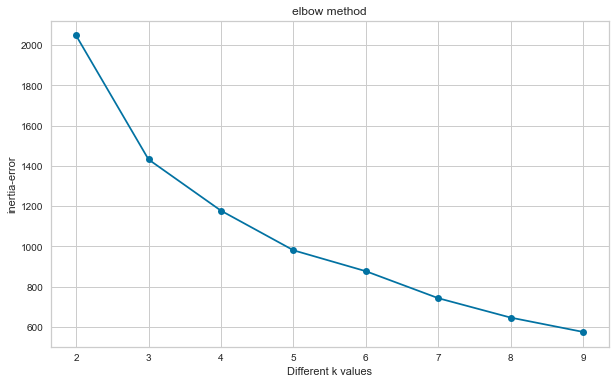

In [105]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [106]:
#Silhoutte_scores for different n_clusters

sils = []
sse = []
ks = range(2,10)

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X_scaled)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, km.predict(X_scaled)))
    
    
sse_df = pd.DataFrame({"K" : ks,
                      "sse": sse,
                      "silhouette": sils})

sse_df

,K,sse,silhouette
0,2,2048.438158,0.849931
1,3,1432.375733,0.798683
2,4,1177.773067,0.435426
3,5,1008.419769,0.525404
4,6,874.856214,0.373505
5,7,781.507300,0.212965
6,8,643.276434,0.395634
7,9,574.318121,0.194416


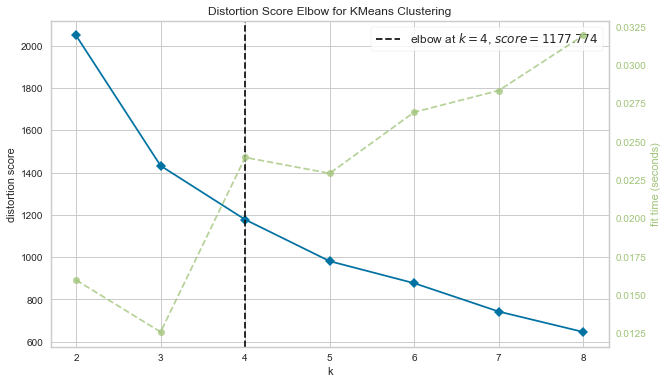

In [107]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

In [109]:
#Kmeans for 4 clusters
km = KMeans(n_clusters = 4)
membership = km.fit_predict(X_scaled)

membership


array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 1, 3,
       3, 0, 0, 3, 3, 3])

### Model Building and label visualisation

In [110]:
model = KMeans(n_clusters = 4, random_state = 42)
model.fit_predict(X_scaled)

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1,
       1, 2, 2, 1, 1, 1])

In [112]:
data1["clusters"] = model.fit_predict(X_scaled)

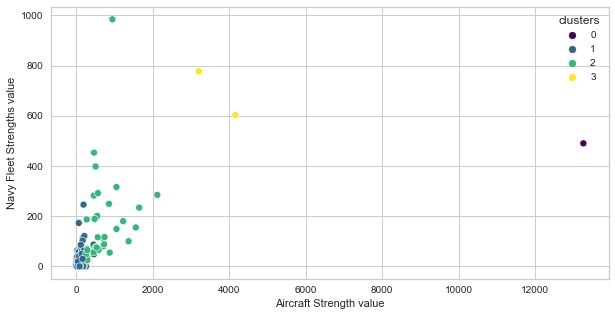

In [115]:
plt.figure(figsize=(10,5))
sns.scatterplot(data1["Aircraft Strength value"], 
                data1["Navy Fleet Strengths value"], hue= data1.clusters,palette= "viridis");

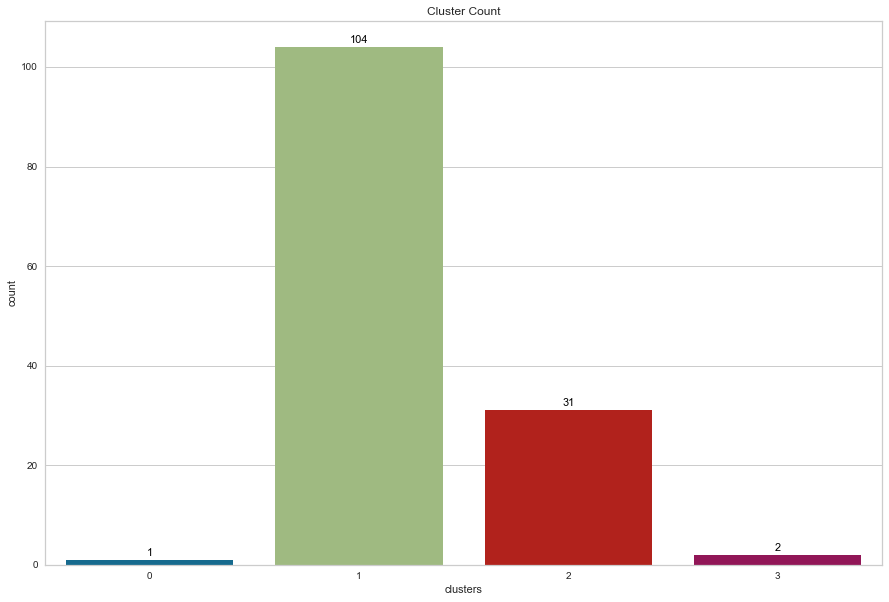

In [116]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = data1.clusters)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                 
    )
plt.show();

In [117]:
data1[data1["clusters"] == 0]

,index,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,clusters
130,130,United States,0.0606,13264,2085,715,945,2643,5768,967,...,0.0,7.500000e+11,1.791000e+13,13513,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,0


In [118]:
data1[data1["clusters"] == 1]

,index,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,clusters
0,0,Afghanistan,1.3444,260,0,25,30,0,187,0,...,0.0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,1
1,1,Albania,2.3137,19,0,0,0,0,19,0,...,0.0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,1
3,3,Angola,0.8379,295,72,18,30,47,126,15,...,0.0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1
4,4,Argentina,0.6521,227,24,7,9,64,100,0,...,0.0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,1
5,5,Armenia,2.1251,64,0,9,3,13,37,20,...,0.0,1.385000e+09,1.041000e+10,11,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,Uruguay,1.8909,50,0,7,9,16,13,0,...,1.0,4.950000e+09,2.837000e+10,133,0.0,55600.0,0.000000e+00,1549878.0,3369299.0,1
132,132,Uzbekistan,0.8086,185,66,20,18,2,79,25,...,0.0,9.750000e+08,1.690000e+10,53,46070.0,142000.0,5.940000e+08,15912566.0,30023709.0,1
135,135,Yemen,1.2412,169,77,0,8,21,61,14,...,0.0,1.400000e+09,7.068000e+09,57,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,1
136,136,Zambia,1.6464,108,18,0,11,52,27,0,...,0.0,4.000000e+07,1.166000e+10,88,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,1


In [119]:
data1[data1["clusters"] == 2]

,index,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,clusters
2,2,Algeria,0.4659,551,103,22,59,87,257,45,...,5.0,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,4.165749e+07,2
17,17,Brazil,0.1988,715,43,78,126,198,242,12,...,7.0,2.780000e+10,5.474000e+11,4093,2622000.0,3020000.0,1.300000e+10,107764996.0,2.088469e+08,2
22,22,Canada,0.3712,385,62,0,38,135,145,0,...,12.0,2.250000e+10,1.608000e+12,1467,3977000.0,2500000.0,1.697000e+11,16110865.0,3.588166e+07,2
27,27,Colombia,0.6045,469,21,38,76,80,224,0,...,4.0,1.060000e+10,1.246000e+11,836,853600.0,300000.0,2.002000e+09,24084498.0,4.816900e+07,2
35,35,Egypt,0.1872,1054,215,88,59,387,294,81,...,7.0,1.120000e+10,7.747000e+10,83,589400.0,832000.0,4.400000e+09,42946553.0,9.941332e+07,2
40,40,France,0.1702,1229,269,0,121,187,589,62,...,11.0,4.150000e+10,5.360000e+12,464,15170.0,1600000.0,7.235000e+07,30111868.0,6.736436e+07,2
43,43,Germany,0.2186,712,128,74,71,26,386,56,...,9.0,5.000000e+10,5.326000e+12,539,43410.0,2500000.0,1.454000e+08,37010559.0,8.045774e+07,2
45,45,Greece,0.5311,566,187,0,15,143,231,29,...,13.0,4.844000e+09,5.066000e+11,77,2753.0,350000.0,1.000000e+07,4993347.0,1.076152e+07,2
49,49,India,0.0953,2123,538,172,250,359,722,23,...,13.0,6.100000e+10,5.016000e+11,346,733900.0,5000000.0,4.621000e+09,622480340.0,1.296834e+09,2
50,50,Indonesia,0.2544,462,41,39,54,109,177,16,...,7.0,7.600000e+09,3.444000e+11,673,801700.0,1630000.0,3.230000e+09,130868127.0,2.627874e+08,2


In [120]:
data1[data1["clusters"] == 3]

,index,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,clusters
26,26,China,0.0691,3210,1232,371,224,314,911,281,...,52.0,2.370000e+11,1.598000e+12,507,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,3
101,101,Russia,0.0681,4163,873,742,424,497,1522,531,...,10.0,4.800000e+10,5.396000e+11,1218,10580000.0,3225000.0,8.000000e+10,69640160.0,1.421228e+08,3


### Evaluate 

In [123]:
model = KMeans(n_clusters = 4, random_state = 42)
model.fit(X_scaled)
print(f'Silhouette Score(n=4): {silhouette_score(X_scaled, model.predict(X_scaled))}')

Silhouette Score(n=4): 0.42808136261005936


In [125]:
ev = pd.DataFrame(X,columns=data1.drop(["Country","clusters"],axis=1).columns)
ev["clusters"] = data1["clusters"]

pred = ev.groupby("clusters").mean().T
pred

clusters,0,1,2,3
index,1.300000e+02,6.547115e+01,7.700000e+01,6.350000e+01
Military Strength Power Index,6.060000e-02,1.826067e+00,3.700000e-01,6.860000e-02
Aircraft Strength value,1.326400e+04,9.396154e+01,7.483871e+02,3.686500e+03
Fighter/Interceptor Strength value,2.085000e+03,1.712500e+01,1.704839e+02,1.052500e+03
Attack Aircraft Strength value,7.150000e+02,4.798077e+00,3.961290e+01,5.565000e+02
Transport Aircraft Fleet Strength value,9.450000e+02,8.673077e+00,5.409677e+01,3.240000e+02
Trainer Aircraft Fleet value,2.643000e+03,2.290385e+01,1.804839e+02,4.055000e+02
Helicopter Fleet Strength value,5.768000e+03,3.975000e+01,2.879355e+02,1.216500e+03
Attack Helicopter Fleet Strength value,9.670000e+02,5.115385e+00,3.951613e+01,4.060000e+02
Tank Strength value,6.289000e+03,1.978942e+02,1.480839e+03,8.225000e+03


## Hierarchical Clustering

In [126]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [ ]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

In [127]:
hc_ward = linkage(y = X, method = "ward") # eklendiği sınıfın varyansını düşürecek şekile ata
hc_complete = linkage(X, "complete") # en uzak noktaya göre en küçük değer
hc_average = linkage(X, "average")  # ortalama
hc_single = linkage(X, "single") #en yakın noktaya göre en küçük değer

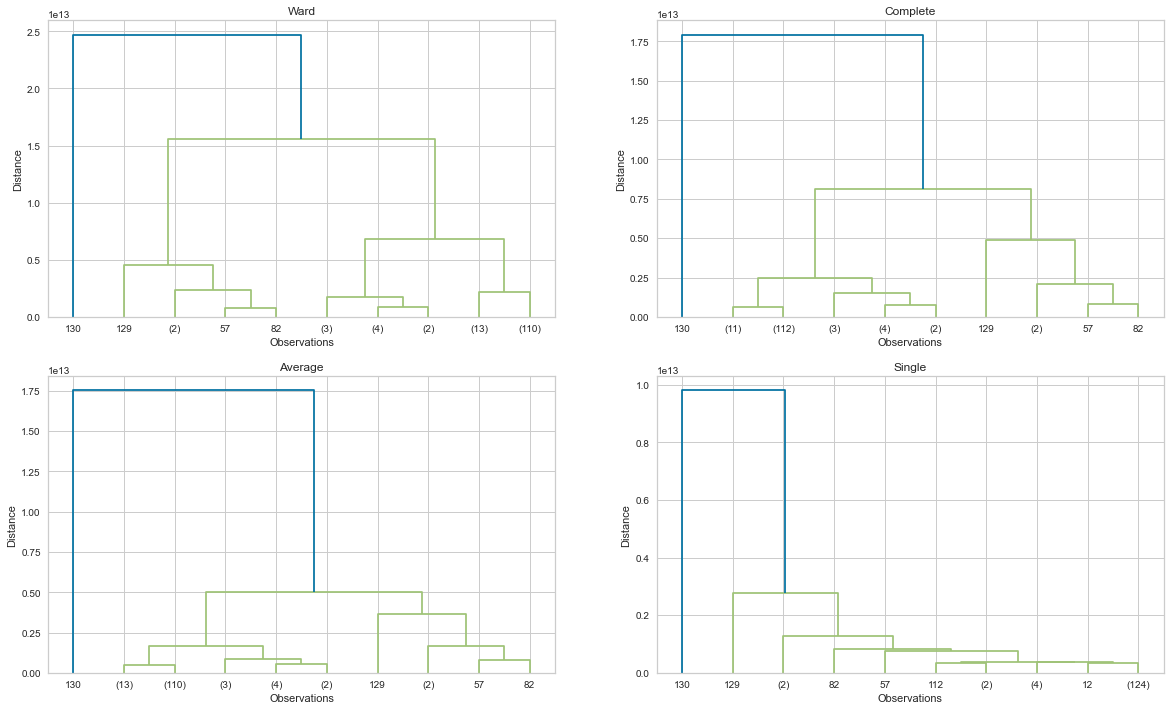

In [128]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### Model Building and label visualisation

In [129]:
from sklearn.cluster import AgglomerativeClustering

In [130]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [131]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9227153206161361
For n_clusters=3, the silhouette score is 0.8995442950406763
For n_clusters=4, the silhouette score is 0.8671436271577667
For n_clusters=5, the silhouette score is 0.8675195540884064
For n_clusters=6, the silhouette score is 0.7789462746208773
For n_clusters=7, the silhouette score is 0.7817947547149927
For n_clusters=8, the silhouette score is 0.7847423624689158


In [132]:
data1["clusters_1"] = model1.labels_

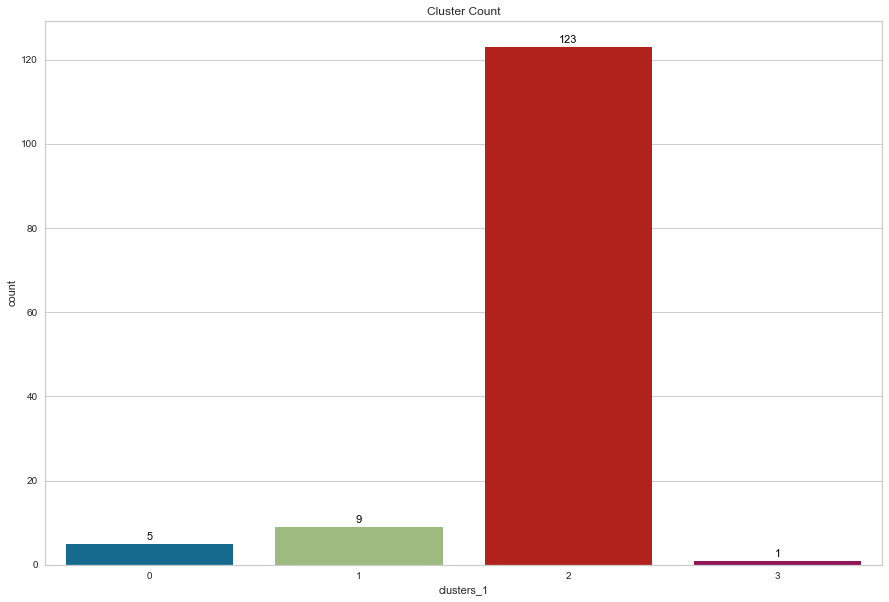

In [134]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = data1.clusters_1)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                
    )
plt.show();

In [135]:
data1[data1["clusters_1"] == 0]

,index,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,clusters,clusters_1
40,40,France,0.1702,1229,269,0,121,187,589,62,...,4.150000e+10,5.360000e+12,464,15170.0,1600000.0,7.235000e+07,30111868.0,67364357.0,2,0
43,43,Germany,0.2186,712,128,74,71,26,386,56,...,5.000000e+10,5.326000e+12,539,43410.0,2500000.0,1.454000e+08,37010559.0,80457737.0,2,0
57,57,Japan,0.1501,1561,279,12,60,427,637,119,...,4.900000e+10,3.240000e+12,175,3841.0,4000000.0,4.412000e+07,53873803.0,126168156.0,2,0
82,82,Netherlands,0.5919,168,61,1,4,27,75,28,...,1.241900e+10,4.063000e+12,29,18170.0,840000.0,1.132000e+08,7820960.0,17151228.0,1,0
129,129,United Kingdom,0.1717,733,133,15,44,241,312,49,...,5.510000e+10,8.126000e+12,460,910500.0,1600000.0,2.564000e+09,29948413.0,65105246.0,2,0


In [136]:
data1[data1["clusters_1"] == 1]

,index,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,clusters,clusters_1
6,6,Australia,0.3225,464,82,6,38,174,133,22,...,2.630000e+10,1.714000e+12,480,263000.0,1005000.0,1.821000e+09,10808002.0,2.347014e+07,1,1
12,12,Belgium,1.0499,148,43,0,12,64,29,0,...,4.921000e+09,1.281000e+12,41,0.0,645000.0,0.000000e+00,4833107.0,1.157076e+07,1,1
22,22,Canada,0.3712,385,62,0,38,135,145,0,...,2.250000e+10,1.608000e+12,1467,3977000.0,2500000.0,1.697000e+11,16110865.0,3.588166e+07,2,1
26,26,China,0.0691,3210,1232,371,224,314,911,281,...,2.370000e+11,1.598000e+12,507,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,3,1
53,53,Ireland,1.9481,19,0,0,0,8,8,0,...,8.700000e+08,2.470000e+12,40,0.0,145000.0,0.000000e+00,2366779.0,5.068050e+06,1,1
55,55,Italy,0.2111,860,99,110,38,185,439,59,...,2.780000e+10,2.444000e+12,129,77530.0,1300000.0,5.567000e+08,28011003.0,6.224667e+07,2,1
112,112,Spain,0.3388,512,137,12,46,162,162,19,...,1.510000e+10,2.094000e+12,150,2252.0,1226000.0,1.500000e+08,23136275.0,4.933108e+07,2,1
116,116,Sweden,0.5304,204,71,0,6,69,53,0,...,6.326924e+09,9.399000e+11,231,0.0,320000.0,0.000000e+00,4116808.0,1.004100e+07,1,1
117,117,Switzerland,0.5259,169,54,0,18,54,42,0,...,5.000000e+09,1.664000e+12,63,0.0,260000.0,0.000000e+00,3632250.0,8.292809e+06,1,1


In [138]:
data1[data1["clusters_1"] == 3]

,index,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,clusters,clusters_1
130,130,United States,0.0606,13264,2085,715,945,2643,5768,967,...,7.500000e+11,1.791000e+13,13513,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,0,3
